<a href="https://colab.research.google.com/github/cdussard/projet-MoodInsight/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)


Using TensorFlow backend.


In [0]:
#load the data
from google.colab import files
uploaded = files.upload()

import io
dataframe = pd.read_csv(io.BytesIO(uploaded['fakejoy.csv']),sep=';')

#dataframe = pandas.read_csv('fakejoyfloat.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')



Saving fakejoy.csv to fakejoy.csv


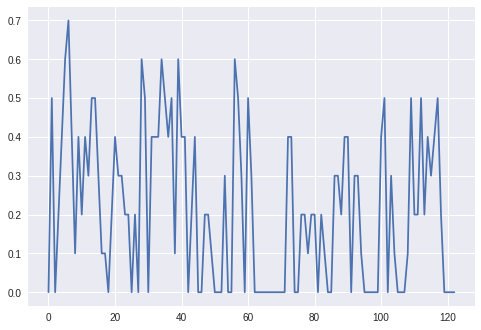

In [0]:
plt.plot(dataset)
plt.show()
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

82 41


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
#print(trainX)
print(trainY)
testX, testY = create_dataset(test, look_back)

[0.71428573 0.         0.2857143  0.5714286  0.8571429  1.
 0.5714286  0.14285715 0.5714286  0.2857143  0.5714286  0.42857146
 0.71428573 0.71428573 0.42857146 0.14285715 0.14285715 0.
 0.2857143  0.5714286  0.42857146 0.42857146 0.2857143  0.2857143
 0.         0.2857143  0.         0.8571429  0.71428573 0.
 0.5714286  0.5714286  0.5714286  0.8571429  0.71428573 0.5714286
 0.71428573 0.14285715 0.8571429  0.5714286  0.5714286  0.
 0.2857143  0.5714286  0.         0.         0.2857143  0.2857143
 0.14285715 0.         0.         0.         0.42857146 0.
 0.         0.8571429  0.71428573 0.42857146 0.         0.71428573
 0.42857146 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.5714286
 0.5714286  0.         0.         0.2857143  0.2857143  0.14285715
 0.2857143  0.2857143 ]


In [0]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
 - 2s - loss: 0.1875
Epoch 2/100
 - 0s - loss: 0.1586
Epoch 3/100
 - 0s - loss: 0.1353
Epoch 4/100
 - 0s - loss: 0.1180
Epoch 5/100
 - 0s - loss: 0.1053
Epoch 6/100
 - 0s - loss: 0.0963
Epoch 7/100
 - 0s - loss: 0.0905
Epoch 8/100
 - 0s - loss: 0.0862
Epoch 9/100
 - 0s - loss: 0.0837
Epoch 10/100
 - 0s - loss: 0.0824
Epoch 11/100
 - 0s - loss: 0.0814
Epoch 12/100
 - 0s - loss: 0.0810
Epoch 13/100
 - 0s - loss: 0.0805
Epoch 14/100
 - 0s - loss: 0.0806
Epoch 15/100
 - 0s - loss: 0.0802
Epoch 16/100
 - 0s - loss: 0.0798
Epoch 17/100
 - 0s - loss: 0.0800
Epoch 18/100
 - 0s - loss: 0.0795
Epoch 19/100
 - 0s - loss: 0.0792
Epoch 20/100
 - 0s - loss: 0.0791
Epoch 21/100
 - 0s - loss: 0.0790
Epoch 22/100
 - 0s - loss: 0.0788
Epoch 23/100
 - 0s - loss: 0.0786
Epoch 24/100
 - 0s - loss: 0.0786
Epoch 25/100
 - 0s - loss: 0.0787
Epoch 26/100
 - 0s - loss: 0.0782
Epoch 27/100
 - 0s - loss: 0.0782
Epoch 28/100
 - 0s - loss: 0.0781
Epoch 29/100
 - 0s - loss: 0.0781
Epoch 30/100
 - 0s - lo

In [0]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.20 RMSE
Test Score: 0.17 RMSE


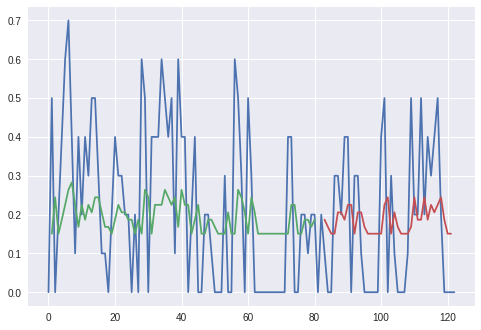

In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
 - 2s - loss: 0.2078
Epoch 2/100
 - 0s - loss: 0.1417
Epoch 3/100
 - 0s - loss: 0.1065
Epoch 4/100
 - 0s - loss: 0.0896
Epoch 5/100
 - 0s - loss: 0.0838
Epoch 6/100
 - 0s - loss: 0.0808
Epoch 7/100
 - 0s - loss: 0.0799
Epoch 8/100
 - 0s - loss: 0.0794
Epoch 9/100
 - 0s - loss: 0.0790
Epoch 10/100
 - 0s - loss: 0.0785
Epoch 11/100
 - 0s - loss: 0.0781
Epoch 12/100
 - 0s - loss: 0.0779
Epoch 13/100
 - 0s - loss: 0.0774
Epoch 14/100
 - 0s - loss: 0.0772
Epoch 15/100
 - 0s - loss: 0.0769
Epoch 16/100
 - 0s - loss: 0.0767
Epoch 17/100
 - 0s - loss: 0.0767
Epoch 18/100
 - 0s - loss: 0.0762
Epoch 19/100
 - 0s - loss: 0.0763
Epoch 20/100
 - 0s - loss: 0.0761
Epoch 21/100
 - 0s - loss: 0.0758
Epoch 22/100
 - 0s - loss: 0.0756
Epoch 23/100
 - 0s - loss: 0.0753
Epoch 24/100
 - 0s - loss: 0.0759
Epoch 25/100
 - 0s - loss: 0.0751
Epoch 26/100
 - 0s - loss: 0.0752
Epoch 27/100
 - 0s - loss: 0.0751
Epoch 28/100
 - 0s - loss: 0.0751
Epoch 29/100
 - 0s - loss: 0.0746
Epoch 30/100
 - 0s - lo

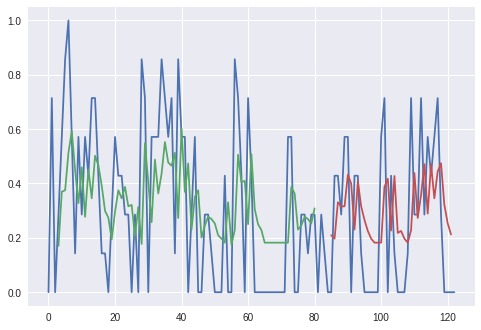

In [0]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
